In [92]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

In [2]:
load_data = pd.read_csv('./data/train.csv', usecols=['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'
                                                     , 'AnimalType', 'SexuponOutcome'
                                                     , 'AgeuponOutcome', 'Breed', 'Color'])

## 1. Preprocessing

In [3]:
load_data.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


### 1.1 Data Changed in Data Frame

In [4]:
# delete Nan data.
#x_data = load_data.dropna()
x_data = load_data

In [5]:
'''
data1 = []
for i in x_data['AgeuponOutcome'] :
    data = i.split(' ')
    if('year' in data[1] ):
        data1.append(int(data[0]) * 365)
    elif('month' in data[1]):
        data1.append(int(data[0]) * 31)
    elif('week' in data[1]):
        data1.append(int(data[0]) * 7)
    elif('day' in data[1]):
        data1.append(int(data[0]))
        
len(data1)
'''

"\ndata1 = []\nfor i in x_data['AgeuponOutcome'] :\n    data = i.split(' ')\n    if('year' in data[1] ):\n        data1.append(int(data[0]) * 365)\n    elif('month' in data[1]):\n        data1.append(int(data[0]) * 31)\n    elif('week' in data[1]):\n        data1.append(int(data[0]) * 7)\n    elif('day' in data[1]):\n        data1.append(int(data[0]))\n        \nlen(data1)\n"

In [6]:
def f(data):
    if('year' in data[1]):
        return int(data[0]) * 365
    elif('month' in data[1]):
        return int(data[0]) * 31
    elif('week' in data[1]):
        return int(data[0]) * 7
    elif('day' in data[1]):
        return int(data[0])    
       

In [7]:
x_data['AgeuponOutcome'].head()

0     1 year
1     1 year
2    2 years
3    3 weeks
4    2 years
Name: AgeuponOutcome, dtype: object

In [8]:
set(x_data['AgeuponOutcome'])

{'5 months',
 nan,
 '16 years',
 '19 years',
 '4 weeks',
 '2 weeks',
 '13 years',
 '11 years',
 '17 years',
 '15 years',
 '20 years',
 '7 months',
 '3 years',
 '7 years',
 '2 months',
 '2 days',
 '11 months',
 '6 months',
 '0 years',
 '10 months',
 '1 year',
 '10 years',
 '1 month',
 '14 years',
 '6 days',
 '3 weeks',
 '1 weeks',
 '3 days',
 '4 months',
 '8 years',
 '18 years',
 '9 years',
 '9 months',
 '6 years',
 '4 years',
 '5 years',
 '8 months',
 '4 days',
 '5 days',
 '5 weeks',
 '1 week',
 '2 years',
 '12 years',
 '1 day',
 '3 months'}

In [9]:
# Find Nan Data
# fill nan data to '0 day'
head_name = x_data.columns[1:7]

for h in head_name:
    if(h == 'AgeuponOutcome'):
        x_data[h] = x_data[h].fillna('0 years')
    else:
        x_data[h] = x_data[h].fillna('Unknown')

#x_data['AgeuponOutcome'] = x_data['AgeuponOutcome'].fillna('0 day')

In [10]:
x_train = pd.DataFrame(data = x_data)
x_train.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [11]:
a = lambda x : f(x.split(' '))

x_train['AgeuponOutcome'] = x_train['AgeuponOutcome'].apply(a)
x_train.head()

,AnimalID,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White
1,A656520,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby
2,A686464,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White
3,A683430,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream
4,A667013,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan


In [12]:
# delete Data Column -> DateTime
x_train.drop('DateTime', axis=1, inplace=True)
x_train.drop('AnimalID', axis=1, inplace=True)
x_train

,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Return_to_owner,Unknown,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White
1,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby
2,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White
3,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream
4,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan
5,Transfer,Partner,Dog,Intact Female,31,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Tabby
7,Transfer,Partner,Cat,Unknown,21,Domestic Shorthair Mix,Brown Tabby
8,Adoption,Unknown,Dog,Spayed Female,155,American Pit Bull Terrier Mix,Red/White
9,Adoption,Offsite,Dog,Spayed Female,365,Cairn Terrier,White


In [13]:
# Changed data to label for classification.
fit_headers = ['OutcomeType', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'Breed', 'Color']
le = LabelEncoder()

for i in enumerate(fit_headers):
    x_train[i[1]] = le.fit_transform(x_train[i[1]])
x_train.head()

,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,3,16,1,2,365,1221,130
1,2,15,0,3,365,640,167
2,0,6,1,2,730,1066,86
3,4,12,0,1,21,640,42
4,4,12,1,2,730,914,274


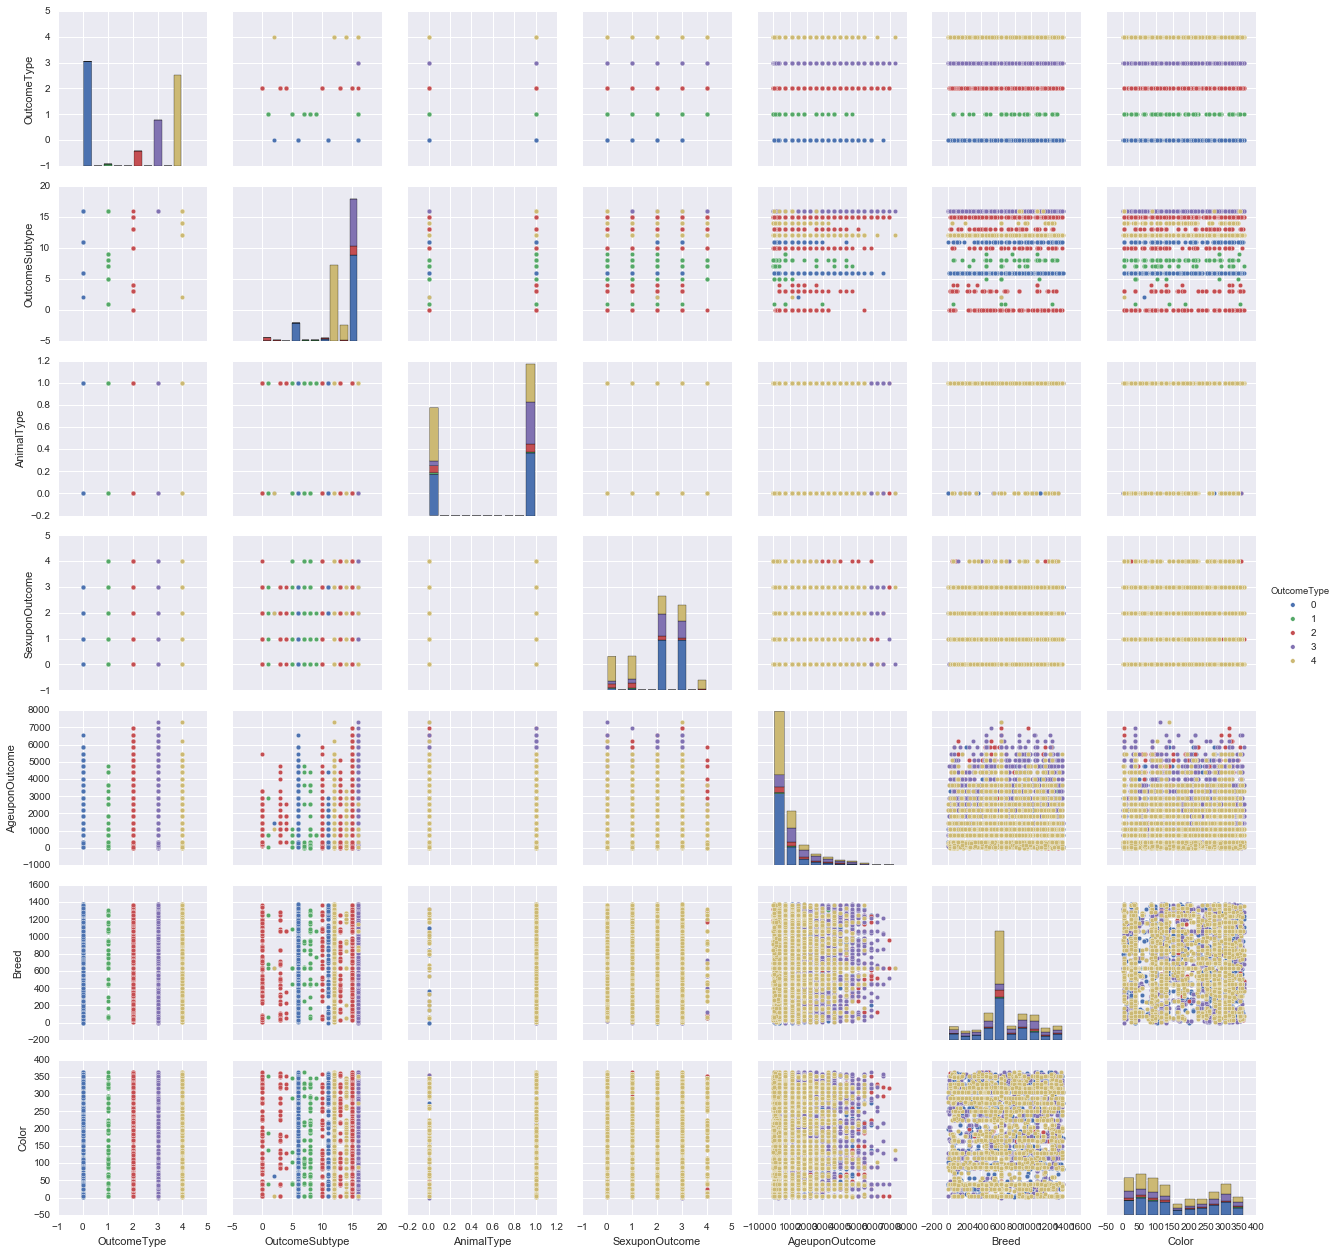

In [15]:
sns.pairplot(x_train, hue='OutcomeType')
plt.show()

In [17]:
# Check the outcome possibility
x_train['OutcomeType'].unique()

array([3, 2, 0, 4, 1], dtype=int64)

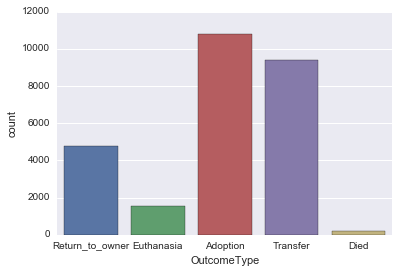

In [18]:
# See the distribution of outcome
sns.countplot(x = 'OutcomeType',data = x_data)

In [77]:
y_train = x_train["OutcomeType"]
y_train[0:10]

0    3
1    2
2    0
3    4
4    4
5    4
6    4
7    4
8    0
9    0
Name: OutcomeType, dtype: int64

In [74]:
x_train_data = x_train.loc[:,('AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color')]
x_train_data.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,2,365,1221,130
1,0,3,365,640,167
2,1,2,730,1066,86
3,0,1,21,640,42
4,1,2,730,914,274
5,1,0,31,369,36
6,0,1,21,640,63
7,0,4,21,640,104
8,1,3,155,45,250
9,1,3,365,364,318


In [93]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_train_data, y_train, train_size =15000, test_size= 11000)

In [94]:
from sklearn.ensemble import RandomForestClassifier
# Do random forest
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train_rf, y_train_rf)
# Let's see the train accuracy
#tra_score=rf.score(x_train, ytrain)
#print("Training accuracy ",tra_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [96]:
print(classification_report(y_test_rf, rf.predict(x_test_rf)))
print(accuracy_score(y_test_rf, rf.predict(x_test_rf)))

             precision    recall  f1-score   support

          0       0.64      0.73      0.68      4429
          1       0.09      0.05      0.07        80
          2       0.20      0.11      0.14       605
          3       0.39      0.36      0.38      1980
          4       0.66      0.63      0.65      3906

avg / total       0.57      0.59      0.58     11000

0.590636363636


In [80]:
load_test_data = pd.read_csv('./data/test.csv', usecols=['AnimalType', 'SexuponOutcome'
                                                     , 'AgeuponOutcome', 'Breed', 'Color'])
load_test_data.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [81]:
x_test = pd.DataFrame(data=load_test_data)
set(x_test['AgeuponOutcome'])

{'5 months',
 nan,
 '16 years',
 '19 years',
 '4 weeks',
 '2 weeks',
 '13 years',
 '11 years',
 '17 years',
 '15 years',
 '20 years',
 '22 years',
 '7 months',
 '3 years',
 '7 years',
 '2 months',
 '2 days',
 '11 months',
 '6 months',
 '0 years',
 '10 months',
 '1 year',
 '10 years',
 '1 month',
 '6 days',
 '14 years',
 '3 weeks',
 '1 weeks',
 '3 days',
 '4 months',
 '8 years',
 '18 years',
 '9 years',
 '9 months',
 '6 years',
 '5 years',
 '4 years',
 '8 months',
 '4 days',
 '5 days',
 '5 weeks',
 '1 week',
 '2 years',
 '12 years',
 '1 day',
 '3 months'}

In [82]:
head_name = x_test.columns

for h in head_name:
    if(h == 'AgeuponOutcome'):
        x_test[h] = x_test[h].fillna('0 years')
    else:
        x_test[h] = x_test[h].fillna('Unknown')

In [83]:
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [84]:
set(x_test['AgeuponOutcome'])

{'0 years',
 '1 day',
 '1 month',
 '1 week',
 '1 weeks',
 '1 year',
 '10 months',
 '10 years',
 '11 months',
 '11 years',
 '12 years',
 '13 years',
 '14 years',
 '15 years',
 '16 years',
 '17 years',
 '18 years',
 '19 years',
 '2 days',
 '2 months',
 '2 weeks',
 '2 years',
 '20 years',
 '22 years',
 '3 days',
 '3 months',
 '3 weeks',
 '3 years',
 '4 days',
 '4 months',
 '4 weeks',
 '4 years',
 '5 days',
 '5 months',
 '5 weeks',
 '5 years',
 '6 days',
 '6 months',
 '6 years',
 '7 months',
 '7 years',
 '8 months',
 '8 years',
 '9 months',
 '9 years'}

In [85]:
a = lambda x : f(x.split(' '))

x_test['AgeuponOutcome'] = x_test['AgeuponOutcome'].apply(a)
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,310,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,730,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,365,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,124,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,730,Miniature Poodle Mix,White


In [86]:
# Changed data to label for classification.
fit_headers = ['AnimalType', 'SexuponOutcome', 'Breed', 'Color']
le = LabelEncoder()

for i in enumerate(fit_headers):
    x_test[i[1]] = le.fit_transform(x_test[i[1]])
x_test.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,0,310,542,185
1,1,3,730,460,28
2,0,2,365,407,79
3,1,1,124,345,229
4,1,2,730,633,238


In [88]:
y_test = rf.predict(x_test)
y_test_proba = rf.predict_proba(x_test)
#y_test_fin = le_out.inverse_transform(x_test)

In [90]:
np.mean(y_test)

1.8426152234636872